<H1>Archivo csv/base de datos</h1>
https://drive.google.com/file/d/1XlZcKo45LdLOj56LbUgRB_lad4l0dssB/view?usp=drive_link.ipynb


In [1]:
#MONTAR mi GOOGLE DRIVE
import pandas as pd
from google.colab import drive
drive.mount('/MIS_DATOS')

Mounted at /MIS_DATOS


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datos_simulados_NISSAN.csv')

In [4]:
df

,dias,Productos_totales,Defectos
0,1,3000,28
1,2,3000,39
2,3,3000,33
3,4,3000,31
4,5,3000,25
5,6,3000,25
6,7,3000,22
7,8,3000,36
8,9,3000,31
9,10,3000,33



<H1>1. Introducción a la distribución normal y su aplicación en cálculo de probabilidades.</h1>



In [5]:
from google.colab import drive
from scipy.stats import f_oneway
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm



# Montar Google Drive
#drive.mount('/content/drive')

# Ruta del archivo
ruta_archivo = '/content/drive/MyDrive/Colab Notebooks/Datos_simulados_NISSAN.csv'

# Leer el archivo
df = pd.read_csv(ruta_archivo)

# Seleccionar la columna 'altura'
columna_a_analizar = 'Defectos'
datos = df[columna_a_analizar]

# Prueba de Shapiro-Wilk
stat, p = stats.shapiro(datos)
print('Estadístico de prueba:', stat)
print('\np-valor:', p)

# Interpretación
alpha = 0.05
if p > alpha:
    print("\nLos datos de 'Defectos' provienen de una distribución aproximadamente normal.")
else:
    print("\nLos datos de 'Defectos' no provienen de una distribución normal.")

Estadístico de prueba: 0.9793734870286207

p-valor: 0.8086583086193927

Los datos de 'Defectos' provienen de una distribución aproximadamente normal.


<H1>2.	Estimación y cálculo de intervalos de confianza.</h1>

In [6]:
# Estimación puntual (media)
media = datos.mean()
print('\nEstimación puntual (media):', media)

# Intervalo de confianza del 95%
intervalo_confianza = stats.t.interval(0.95, len(datos)-1, loc=media, scale=stats.sem(datos))
print('\nIntervalo de confianza del 95%:', intervalo_confianza)


Estimación puntual (media): 28.9

Intervalo de confianza del 95%: (27.00777346194086, 30.792226538059136)


<H1>3.	Inferencia sobre medias y pruebas de hipótesis.</h1>

In [7]:
#promedio historico
mu_0 = 30

#la prueba t, se compara la media muestral con el promedio histórico
t_stat, p_value = stats.ttest_1samp(datos, mu_0)
print('\nEstadístico t:', t_stat)
print('\np-valor:', p_value)

#se compara el valor p con el nivel de significancia alpha para saber si se rechaza o no la hipótesis nula.
if p_value < alpha:
    print("\nRechazamos la hipótesis nula. El promedio de defectos ha cambiado.")
else:
    print("\nNo rechazamos la hipótesis nula. No hay evidencia suficiente para decir que el promedio de defectos ha cambiado.")



Estadístico t: -1.1889446433055273

p-valor: 0.24410617255410072

No rechazamos la hipótesis nula. No hay evidencia suficiente para decir que el promedio de defectos ha cambiado.


<H1>4.	Análisis de desviaciones estándar y pruebas relacionadas.</h1>

In [8]:
#Desviación estándar
desv_est = np.std(datos)
print('\nDesviación estándar:', desv_est)

#Variancia
var = np.var(datos)
print('\nVarianza:', var)

#Coeficiente de variación
coef_var = desv_est / media
print('\nCoeficiente de variación:', coef_var)


Desviación estándar: 4.982302011453474

Varianza: 24.823333333333338

Coeficiente de variación: 0.17239799347589876


<H1>5.	Análisis de varianza (ANOVA).</h1>

In [9]:
#ANOVA
semana1=df[columna_a_analizar][0:8]
semana2=df[columna_a_analizar][8:15]
semana3=df[columna_a_analizar][15:22]
semana4=df[columna_a_analizar][22:30]

_, Pvalue= f_oneway(semana1,semana2,semana3,semana4)
print ("\nAnálisis ANOVA:",Pvalue)


Análisis ANOVA: 0.7507400361825515


<H1>6.	Correlación y regresión lineal.</h1>


Correlación de lotes y defectos: -0.211 



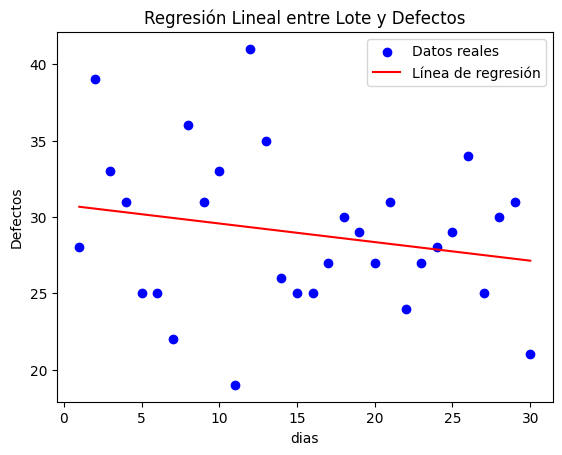

In [10]:
#Correlación
columna_a_analizar_ = 'dias'
datos2 = df[columna_a_analizar_]
corr, _ = pearsonr(datos, datos2)
print('\nCorrelación de lotes y defectos: %.3f' % corr,"\n")

#Regresión lineal
X = df['dias'].values.reshape(-1, 1)
y = df['Defectos'].values
modelo = LinearRegression()
modelo.fit(X, y)
y_pred = modelo.predict(X)
plt.scatter(X, y, color='blue', label='Datos reales')
plt.plot(X, y_pred, color='red', label='Línea de regresión')
plt.xlabel('dias')
plt.ylabel('Defectos')
plt.title('Regresión Lineal entre Lote y Defectos')
plt.legend()
plt.show()

<H1>7.	Análisis de series de tiempo.</h1>

<ipython-input-11-b1c058f4bfd7>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datos_simulados_NISSAN.csv",


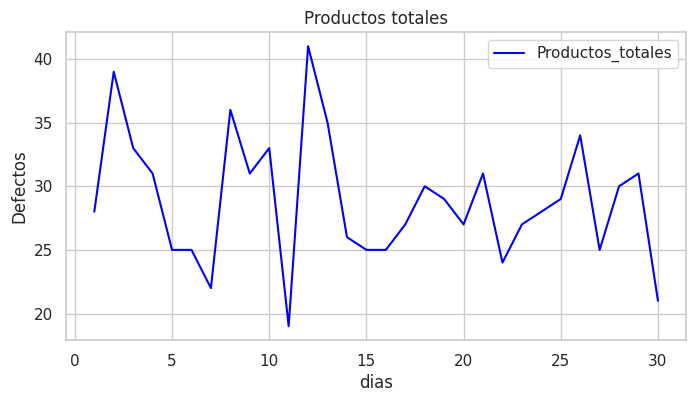

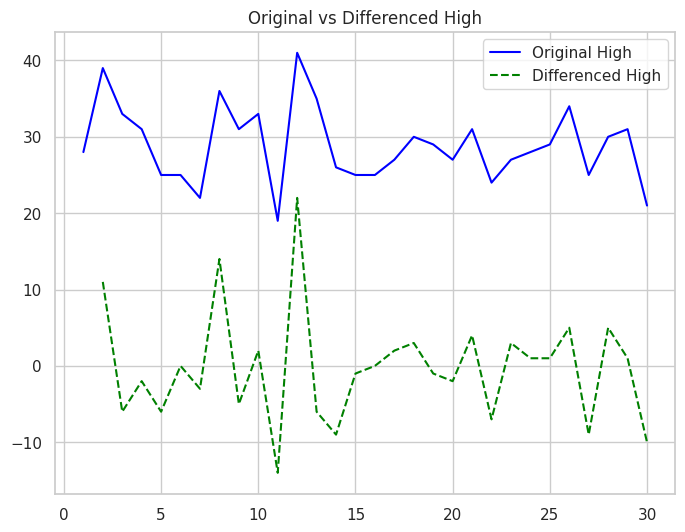

In [11]:
# reading the dataset using read_csv
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datos_simulados_NISSAN.csv",
				parse_dates=True,
				index_col="dias")

# BORRAR COLUMNA DE NOMBRE PARA PROCESARLA
df.drop(columns='Productos_totales', inplace =True)
df

# SERIES DE TIEMPO EN GRAFICA DE LINEAS
sns.set(style="whitegrid") # FONDO de  Gràfica Blanco

plt.figure(figsize=(8, 4)) # Setting the figure size
sns.lineplot(data=df, x='dias', y='Defectos', label='Productos_totales', color='blue')

#titulo y lineas
plt.xlabel('dias')
plt.ylabel('Defectos')
plt.title('Productos totales')
plt.show()

# Para observar cambios abruptos entre observaciones o muestras.
df['dias'] = df['Defectos'].diff()


#salto de linea
print("\n")


# grafica
plt.figure(figsize=(8, 6))
plt.plot(df['Defectos'], label='Original High', color='blue')
plt.plot(df['dias'], label='Differenced High', linestyle='--', color='green')
plt.legend()
plt.title('Original vs Differenced High')
plt.show()
